In [46]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics

In [4]:
df = pd.read_csv('df_final_chapter_1.csv')

In [33]:
x_train, x_test, y_train, y_test = train_test_split(df['LIMIT_BAL'].values.reshape(-1,1), df['default payment next month'], test_size = 0.2 , random_state = 24)

### answer for why we need to reshape the feature
https://stackoverflow.com/questions/51150153/valueerror-expected-2d-array-got-1d-array-instead

In [34]:
y_test

14306    0
2978     0
16641    0
18580    1
131      0
        ..
18160    0
19779    0
6666     0
18990    0
23253    1
Name: default payment next month, Length: 5333, dtype: int64

In [35]:
df['LIMIT_BAL'].shape

(26664,)

In [36]:
df['default payment next month'].shape

(26664,)

In [37]:
df['LIMIT_BAL'].values.reshape(-1,1).shape

(26664, 1)

In [70]:
 sum(df['default payment next month'].values)

5914

In [72]:
df['default payment next month'].values.shape[0]

26664

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
log_reg = LogisticRegression(C = 0.1 , solver = 'liblinear')

In [41]:
## https://stackoverflow.com/questions/38640109/logistic-regression-python-solvers-definitions

In [42]:
log_reg.fit(x_train, y_train)

LogisticRegression(C=0.1, solver='liblinear')

In [43]:
y_pred = log_reg.predict(x_test)

In [44]:
is_correct =  y_test == y_pred

In [45]:
np.mean(is_correct)

0.7834239639977498

In [47]:
metrics.accuracy_score(y_pred, y_test)

0.7834239639977498

In [51]:
y_pred 

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [54]:
P = sum(y_test)
P

1155

In [57]:
TP = sum((y_test == 1)&(y_pred ==1))
TP

0

In [59]:
N = sum(y_test == 0)
N

4178

In [61]:
N+P

5333

In [62]:
TN = sum((y_test == 0)&(y_pred == 0))
TN

4178

In [63]:
FP = sum((y_test == 0)& (y_pred == 1))

In [64]:
metrics.confusion_matrix(y_test, y_pred)

array([[4178,    0],
       [1155,    0]], dtype=int64)

In [67]:
y_pred_prob = log_reg.predict_proba(x_test)
y_pred_prob

array([[0.74826924, 0.25173076],
       [0.584297  , 0.415703  ],
       [0.79604453, 0.20395547],
       ...,
       [0.584297  , 0.415703  ],
       [0.82721498, 0.17278502],
       [0.66393434, 0.33606566]])

In [73]:
y_pred_prob.shape

(5333, 2)

In [75]:
pos_prob = y_pred_prob[:,1]
pos_prob

array([0.25173076, 0.415703  , 0.20395547, ..., 0.415703  , 0.17278502,
       0.33606566])

(array([280., 509., 414., 538., 587., 610., 412., 491., 782., 710.]),
 array([0.00644178, 0.05409607, 0.10175036, 0.14940464, 0.19705893,
        0.24471322, 0.29236751, 0.34002179, 0.38767608, 0.43533037,
        0.48298465]),
 <BarContainer object of 10 artists>)

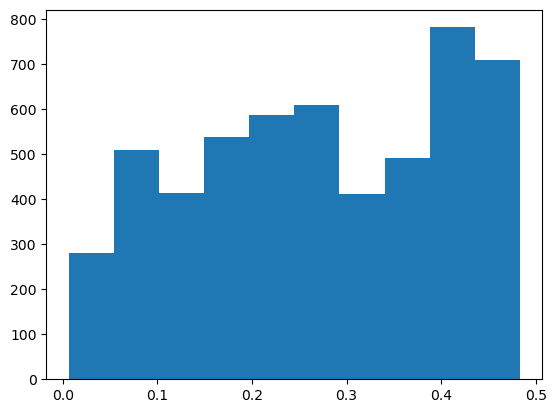

In [76]:
plt.hist(pos_prob)

In [77]:
metrics.roc_auc_score(y_test, pos_prob)

0.6201990844642832

In [78]:
y_test

14306    0
2978     0
16641    0
18580    1
131      0
        ..
18160    0
19779    0
6666     0
18990    0
23253    1
Name: default payment next month, Length: 5333, dtype: int64

In [82]:
precision, recall, threshold = metrics.precision_recall_curve(y_test, pos_prob)

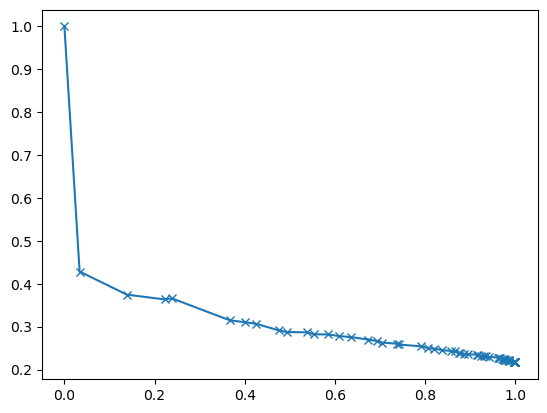

In [97]:
plt.plot(recall,precision,"-x")

In [92]:
from scipy.integrate import simps

In [95]:
area_under_curve = simps(precision,recall)
area_under_curve

-0.302692949480106

In [98]:
metrics.auc(recall,precision)

0.31566964427378624

In [99]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, pos_prob)

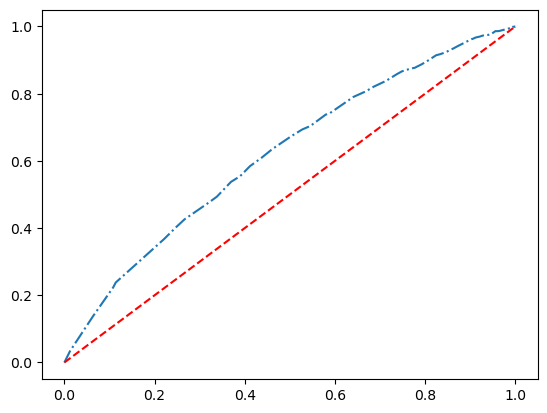

In [106]:
plt.plot(fpr, tpr,'-.')
plt.plot([0,1],[0,1],'r--')

In [110]:
y_train_pred_prob = log_reg.predict_proba(x_train)

In [111]:
metrics.roc_auc_score(y_train, y_train_pred_prob[:,1])

0.6182918113358344